In [46]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
sys.path = list(np.insert(sys.path, 0, "../../../pyvista"))


#sys.path("../../../pyvista")

import pyvista

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = path_to_data + "model5_orientations.csv",
                        path_i = path_to_data + "model5_surface_points.csv") 

Active grids: ['regular']


In [3]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False
Basement,False,False


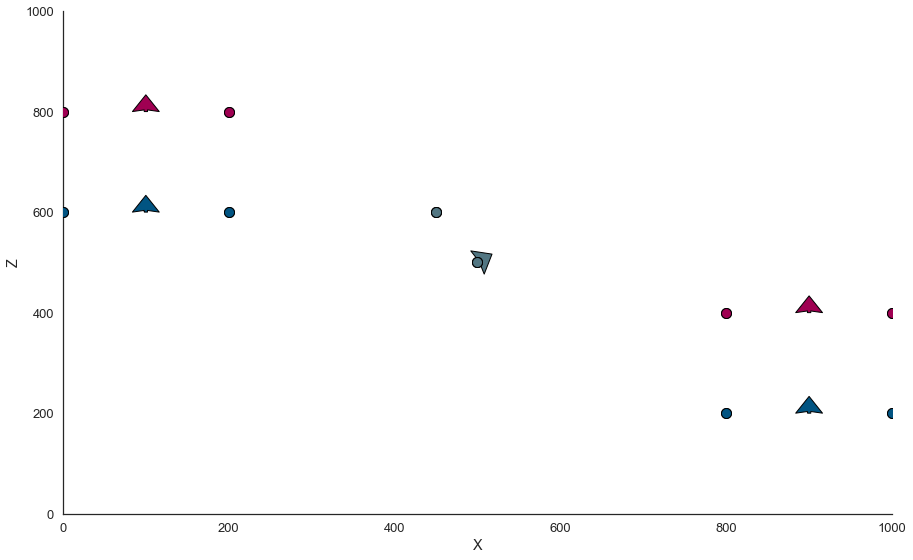

In [4]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

In [5]:
geo_data.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
4,500,500,500,0.5001,0.5001,0.5001,8.660254e-01,1.000053e-12,0.5,60,90,1,fault,Fault_Series,1,1,0.01
1,100,500,600,0.3001,0.5001,0.5501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,2,2,0.01
3,900,500,200,0.7001,0.5001,0.3501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,2,2,0.01
0,100,500,800,0.3001,0.5001,0.6501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,3,2,0.01
2,900,500,400,0.7001,0.5001,0.4501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,3,2,0.01


In [6]:
geo_data.surfaces

,surface,series,order_surfaces,isBasement,color,id
2,fault,Fault_Series,1,False,#527682,1
0,rock1,Strat_Series,1,False,#015482,2
1,rock2,Strat_Series,2,False,#9f0052,3
3,basement,Basement,1,True,#728f02,4


Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!


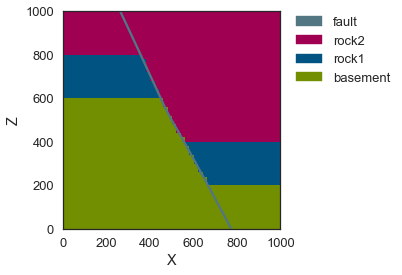

In [7]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_data)
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=False, show_all_data=True)

## Pyvista

In [8]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [9]:
gv = vista.Vista(geo_data, plotter_type='basic')
gv.create_structured_grid()
gv.set_structured_grid_data()
#gv.p.add_mesh(gv.vista_rgrid)

**When a sclar valur is added after passing the mesh to the plotter, the plotter does not display it. If you set the scalar before it does. Why?**

In [10]:
gv.p.mesh is gv.vista_rgrid

True

In [11]:
gv.p.show(use_panel=True)

VTK(vtkCocoaRenderWindow, height=400, sizing_mode='stretch_width')

In [12]:
gv.vista_rgrid.active_scalar_name

'lith'

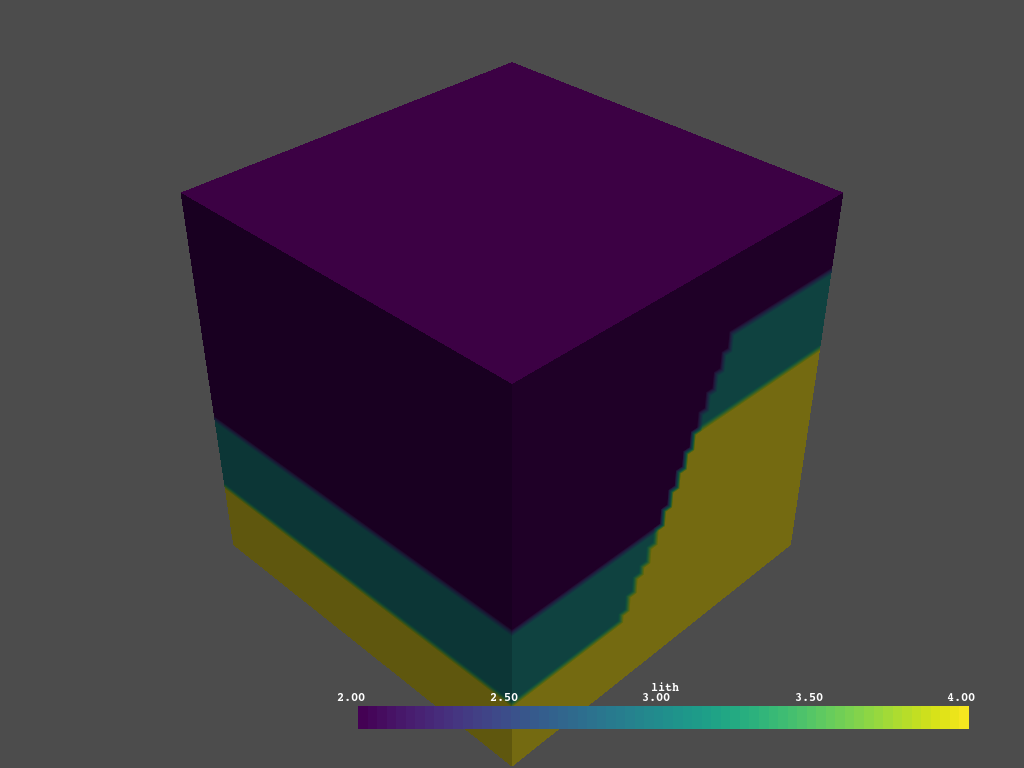

In [13]:
gv.vista_rgrid.plot()

**Is there a way to recover the renderer?**

In [14]:
gv.p.show()

AttributeError: 'Plotter' object has no attribute 'ren_win'

### Surfaces:

In [15]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [16]:
gv = vista.Vista(geo_data)

In [17]:
gv.set_surfaces()
gv.p.show_grid()


**Is there a way to plot the grid with panel?** Prob no because is a widget.

In [18]:
gv.p.show(use_panel=True)

VTK(vtkCocoaRenderWindow, height=400, sizing_mode='stretch_width')

### Plot data

In [19]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [20]:
gv = vista.Vista(geo_data, plotter_type='background')
#gv.set_surface_points()
#gv.set_surfaces()
#gv.p.show_bounds(bounds=geo_data.grid.regular_grid.extent, location='furthest', use_2d=False, grid=False)
#o = 


In [91]:
#gv.p.view_isometric(negative=True)

In [22]:
gv.set_orientations();

In [23]:
gv.set_surface_points();

In [24]:
gv.p.show_bounds(bounds=geo_data.grid.regular_grid.extent, location='furthest', use_2d=False, grid=True)

### Data and surfaces: Background

In [25]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [33]:
gv = vista.Vista(geo_data, plotter_type='background', notebook=True, real_time=False)
#gv.set_surface_points()
#gv.set_orientations()
#gv.set_surfaces()
#gv.p.show_grid()


In [34]:
gv.set_surface_points();

In [35]:
gv.set_orientations();

In [36]:
gv.set_surfaces();

In [37]:
geo_data.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
4,500,500,500,0.5001,0.499666,0.5001,8.660254e-01,1.000053e-12,0.5,60,90,1,fault,Fault_Series,1,1,0.01
0,100,500,800,0.3001,0.499666,0.6501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,2,2,0.01
2,900,500,400,0.7001,0.499666,0.4501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,2,2,0.01
1,100,500,600,0.3001,0.499666,0.5501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,3,2,0.01
3,900,500,200,0.7001,0.499666,0.3501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,3,2,0.01


In [38]:
geo_data.modify_surface_points(0, Z=1000)

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
16,500.00000,500.000000,500.000000,0.500100,0.499666,0.450100,fault,Fault_Series,1,1,0.000001
17,450.00000,500.000000,600.000000,0.475100,0.499666,0.500100,fault,Fault_Series,1,1,0.000001
18,500.00000,200.000000,500.000000,0.500100,0.349666,0.450100,fault,Fault_Series,1,1,0.000001
19,450.00000,200.000000,600.000000,0.475100,0.349666,0.500100,fault,Fault_Series,1,1,0.000001
20,500.00000,800.000000,500.000000,0.500100,0.649666,0.450100,fault,Fault_Series,1,1,0.000001
21,450.00000,800.000000,600.000000,0.475100,0.649666,0.500100,fault,Fault_Series,1,1,0.000001
8,0.00000,200.000000,800.000000,0.250100,0.349666,0.600100,rock2,Strat_Series,2,2,0.000001
9,0.00000,800.000000,800.000000,0.250100,0.649666,0.600100,rock2,Strat_Series,2,2,0.000001
10,200.00000,200.000000,800.000000,0.350100,0.349666,0.600100,rock2,Strat_Series,2,2,0.000001
11,200.00000,800.000000,800.000000,0.350100,0.649666,0.600100,rock2,Strat_Series,2,2,0.000001


In [39]:
gv.update_surfaces_real_time()

True

In [ ]:
# gv.p.show()

### Interaction

In [44]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [45]:
gv = vista.Vista(geo_data, notebook=False, plotter_type='background', real_time=True)
gv.set_surfaces()
gv.set_surface_points()
gv.set_orientations()

,val
4,vtkPlaneWidget (0x7fed90ef9be0)\n Debug: Off\...
0,vtkPlaneWidget (0x7fedc3db3580)\n Debug: Off\...
2,vtkPlaneWidget (0x7fed911cbd90)\n Debug: Off\...
1,vtkPlaneWidget (0x7fedc32aed30)\n Debug: Off\...
3,vtkPlaneWidget (0x7fed91267b80)\n Debug: Off\...


### Adding point

In [47]:
import sys

from PyQt5 import Qt
import numpy as np

import pyvista as pv


class MainWindow(Qt.QMainWindow):

    def __init__(self, parent=None, show=True):
        Qt.QMainWindow.__init__(self, parent)

        # create the frame
        self.frame = Qt.QFrame()
        vlayout = Qt.QVBoxLayout()

        # add the pyvista interactor object
        self.vtk_widget = pv.QtInteractor(self.frame)
        vlayout.addWidget(self.vtk_widget)

        self.frame.setLayout(vlayout)
        self.setCentralWidget(self.frame)

        # simple menu to demo functions
        mainMenu = self.menuBar()
        fileMenu = mainMenu.addMenu('File')
        exitButton = Qt.QAction('Exit', self)
        exitButton.setShortcut('Ctrl+Q')
        exitButton.triggered.connect(self.close)
        fileMenu.addAction(exitButton)

        # allow adding a sphere
        meshMenu = mainMenu.addMenu('Mesh')
        self.add_sphere_action = Qt.QAction('Add Sphere', self)
        self.add_sphere_action.triggered.connect(self.add_sphere)
        meshMenu.addAction(self.add_sphere_action)

        if show:
            self.show()

    def add_sphere(self):
        """ add a sphere to the pyqt frame """
        sphere = pv.Sphere()
        self.vtk_widget.add_mesh(sphere)
        self.vtk_widget.reset_camera()

In [ ]:
app = Qt.QApplication(sys.argv)
window = MainWindow()
sys.exit(app.exec_())

### Bane code

In [ ]:
import pyvista as pv
from pyvista import examples

mesh = examples.download_kitchen()

plotter = pv.BackgroundPlotter()
plotter.add_mesh_clip_plane(mesh)

In [ ]:
streamlines = mesh.streamlines(n_points=40, source_center=(0.08, 3, 0.71))
plotter.add_mesh(streamlines.tube(radius=0.01), scalars="velocity", lighting=False)